In [4]:
import pygmt
import xarray as xr
import ensaio
import boule as bl
import harmonica as hm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import scipy.stats

In [5]:
fname_gravity = ensaio.fetch_earth_gravity(version=1)
print(fname_gravity)

/home/gabriel/.cache/ensaio/v1/earth-gravity-10arcmin.nc


In [6]:
# gravidade observada da Terra a 10km de altitude contando com aceleração centrípeta
data = xr.load_dataarray(fname_gravity)
data

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)> Size: 19MB
array([[980106.525, 980106.525, 980106.525, ..., 980106.525, 980106.525,
        980106.525],
       [980108.225, 980108.225, 980108.225, ..., 980108.225, 980108.225,
        980108.225],
       [980108.825, 980108.825, 980108.825, ..., 980108.725, 980108.725,
        980108.825],
       ...,
       [980153.825, 980153.725, 980153.625, ..., 980153.925, 980153.825,
        980153.825],
       [980160.425, 980160.425, 980160.425, ..., 980160.425, 980160.425,
        980160.425],
       [980157.525, 980157.525, 980157.525, ..., 980157.525, 980157.525,
        980157.525]], shape=(1081, 2161))
Coordinates:
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04
Attributes:
    Conventions:     CF-1.8
    title:           Gravity acceleration (EIGEN-6C4) at a constant geometric...
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       gravity acceleration
    description:     magnitude of the gravity acceleration vector (gravitatio...
    units:           mGal
    actual_range:    [974748.6 980201.9]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

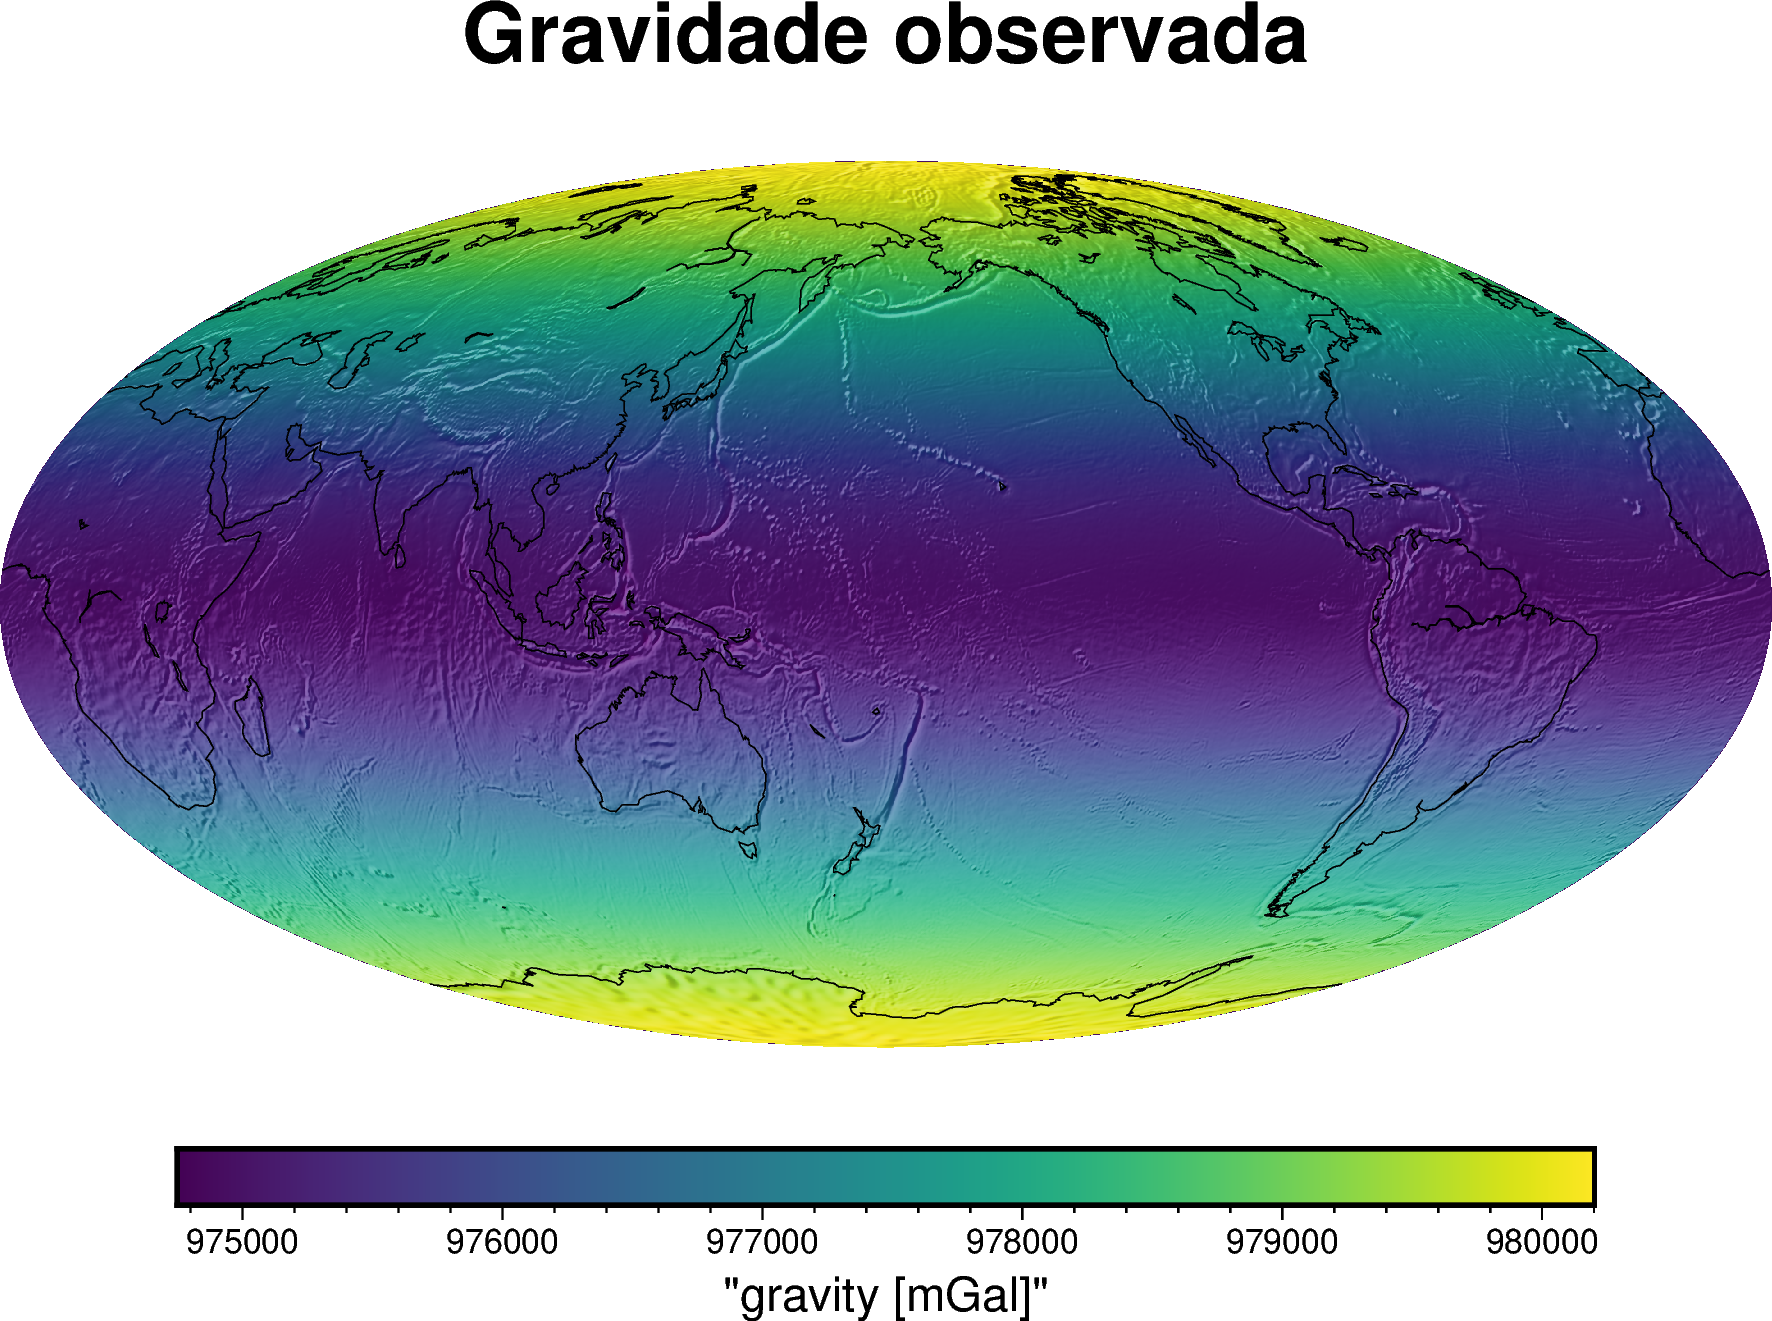

In [7]:
fig = pygmt.Figure()

fig.basemap(
    region = 'g',
    projection = 'W15C',
    frame = '+tGravidade observada',
)

fig.grdimage(data, cmap = 'viridis', shading = '+nt0.5')
fig.colorbar(frame='af+l"gravity [mGal]"')
fig.coast(shorelines = True, resolution = 'c', area_thresh=1e4)
fig.show()

In [8]:
normal_gravity = bl.WGS84.normal_gravity(data.latitude, data.height,)
normal_gravity

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[980142.33509235, 980142.33509235, 980142.33509235, ...,
        980142.33509235, 980142.33509235, 980142.33509235],
       [980142.29097894, 980142.29097894, 980142.29097894, ...,
        980142.29097894, 980142.29097894, 980142.29097894],
       [980142.15864042, 980142.15864042, 980142.15864042, ...,
        980142.15864042, 980142.15864042, 980142.15864042],
       ...,
       [980142.15864042, 980142.15864042, 980142.15864042, ...,
        980142.15864042, 980142.15864042, 980142.15864042],
       [980142.29097894, 980142.29097894, 980142.29097894, ...,
        980142.29097894, 980142.29097894, 980142.29097894],
       [980142.33509235, 980142.33509235, 980142.33509235, ...,
        980142.33509235, 980142.33509235, 980142.33509235]],
      shape=(1081, 2161))
Coordinates:
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

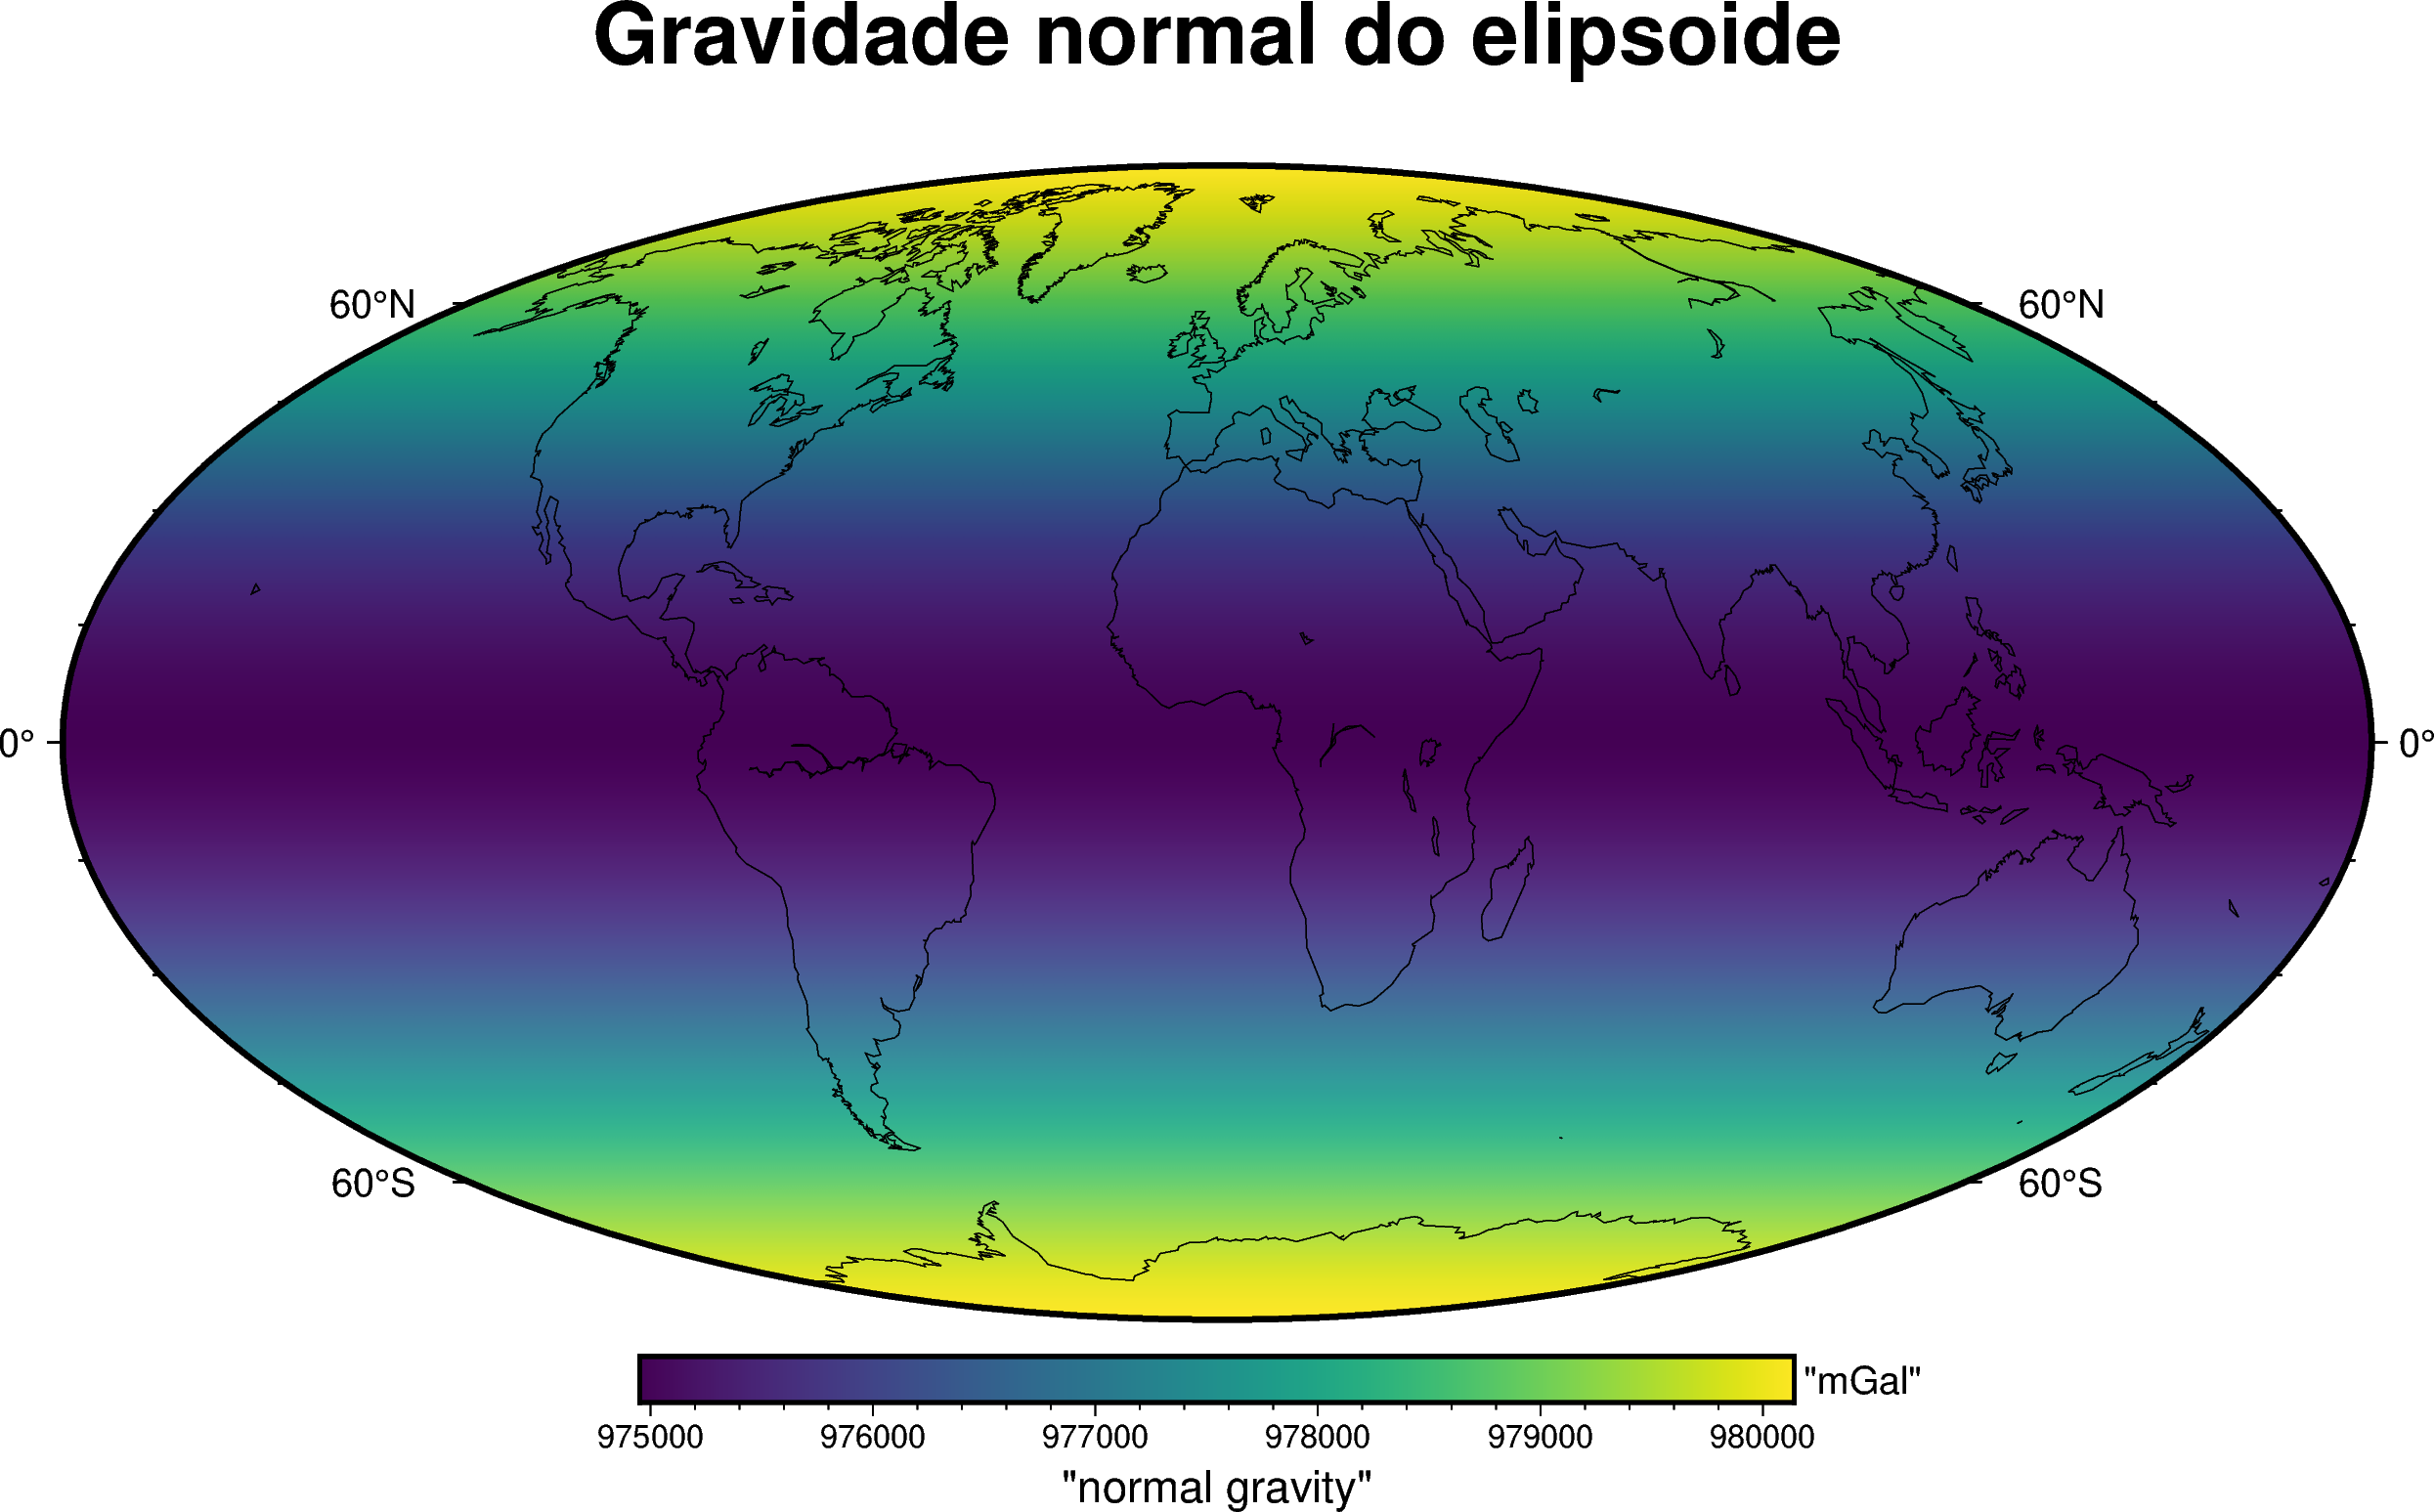

In [9]:
fig = pygmt.Figure()
fig.grdimage(
    normal_gravity,
    projection="W20c",
    cmap="viridis",
    shading="+a45+nt0.2",
    frame = '+tGravidade normal do elipsoide'
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"normal gravity"',],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.show()

In [10]:
disturbance = data - normal_gravity # anomalia ar livre
disturbance

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-35.81009235, -35.81009235, -35.81009235, ..., -35.81009235,
        -35.81009235, -35.81009235],
       [-34.06597894, -34.06597894, -34.06597894, ..., -34.06597894,
        -34.06597894, -34.06597894],
       [-33.33364042, -33.33364042, -33.33364042, ..., -33.43364042,
        -33.43364042, -33.33364042],
       ...,
       [ 11.66635958,  11.56635958,  11.46635958, ...,  11.76635958,
         11.66635958,  11.66635958],
       [ 18.13402106,  18.13402106,  18.13402106, ...,  18.13402106,
         18.13402106,  18.13402106],
       [ 15.18990765,  15.18990765,  15.18990765, ...,  15.18990765,
         15.18990765,  15.18990765]], shape=(1081, 2161))
Coordinates:
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

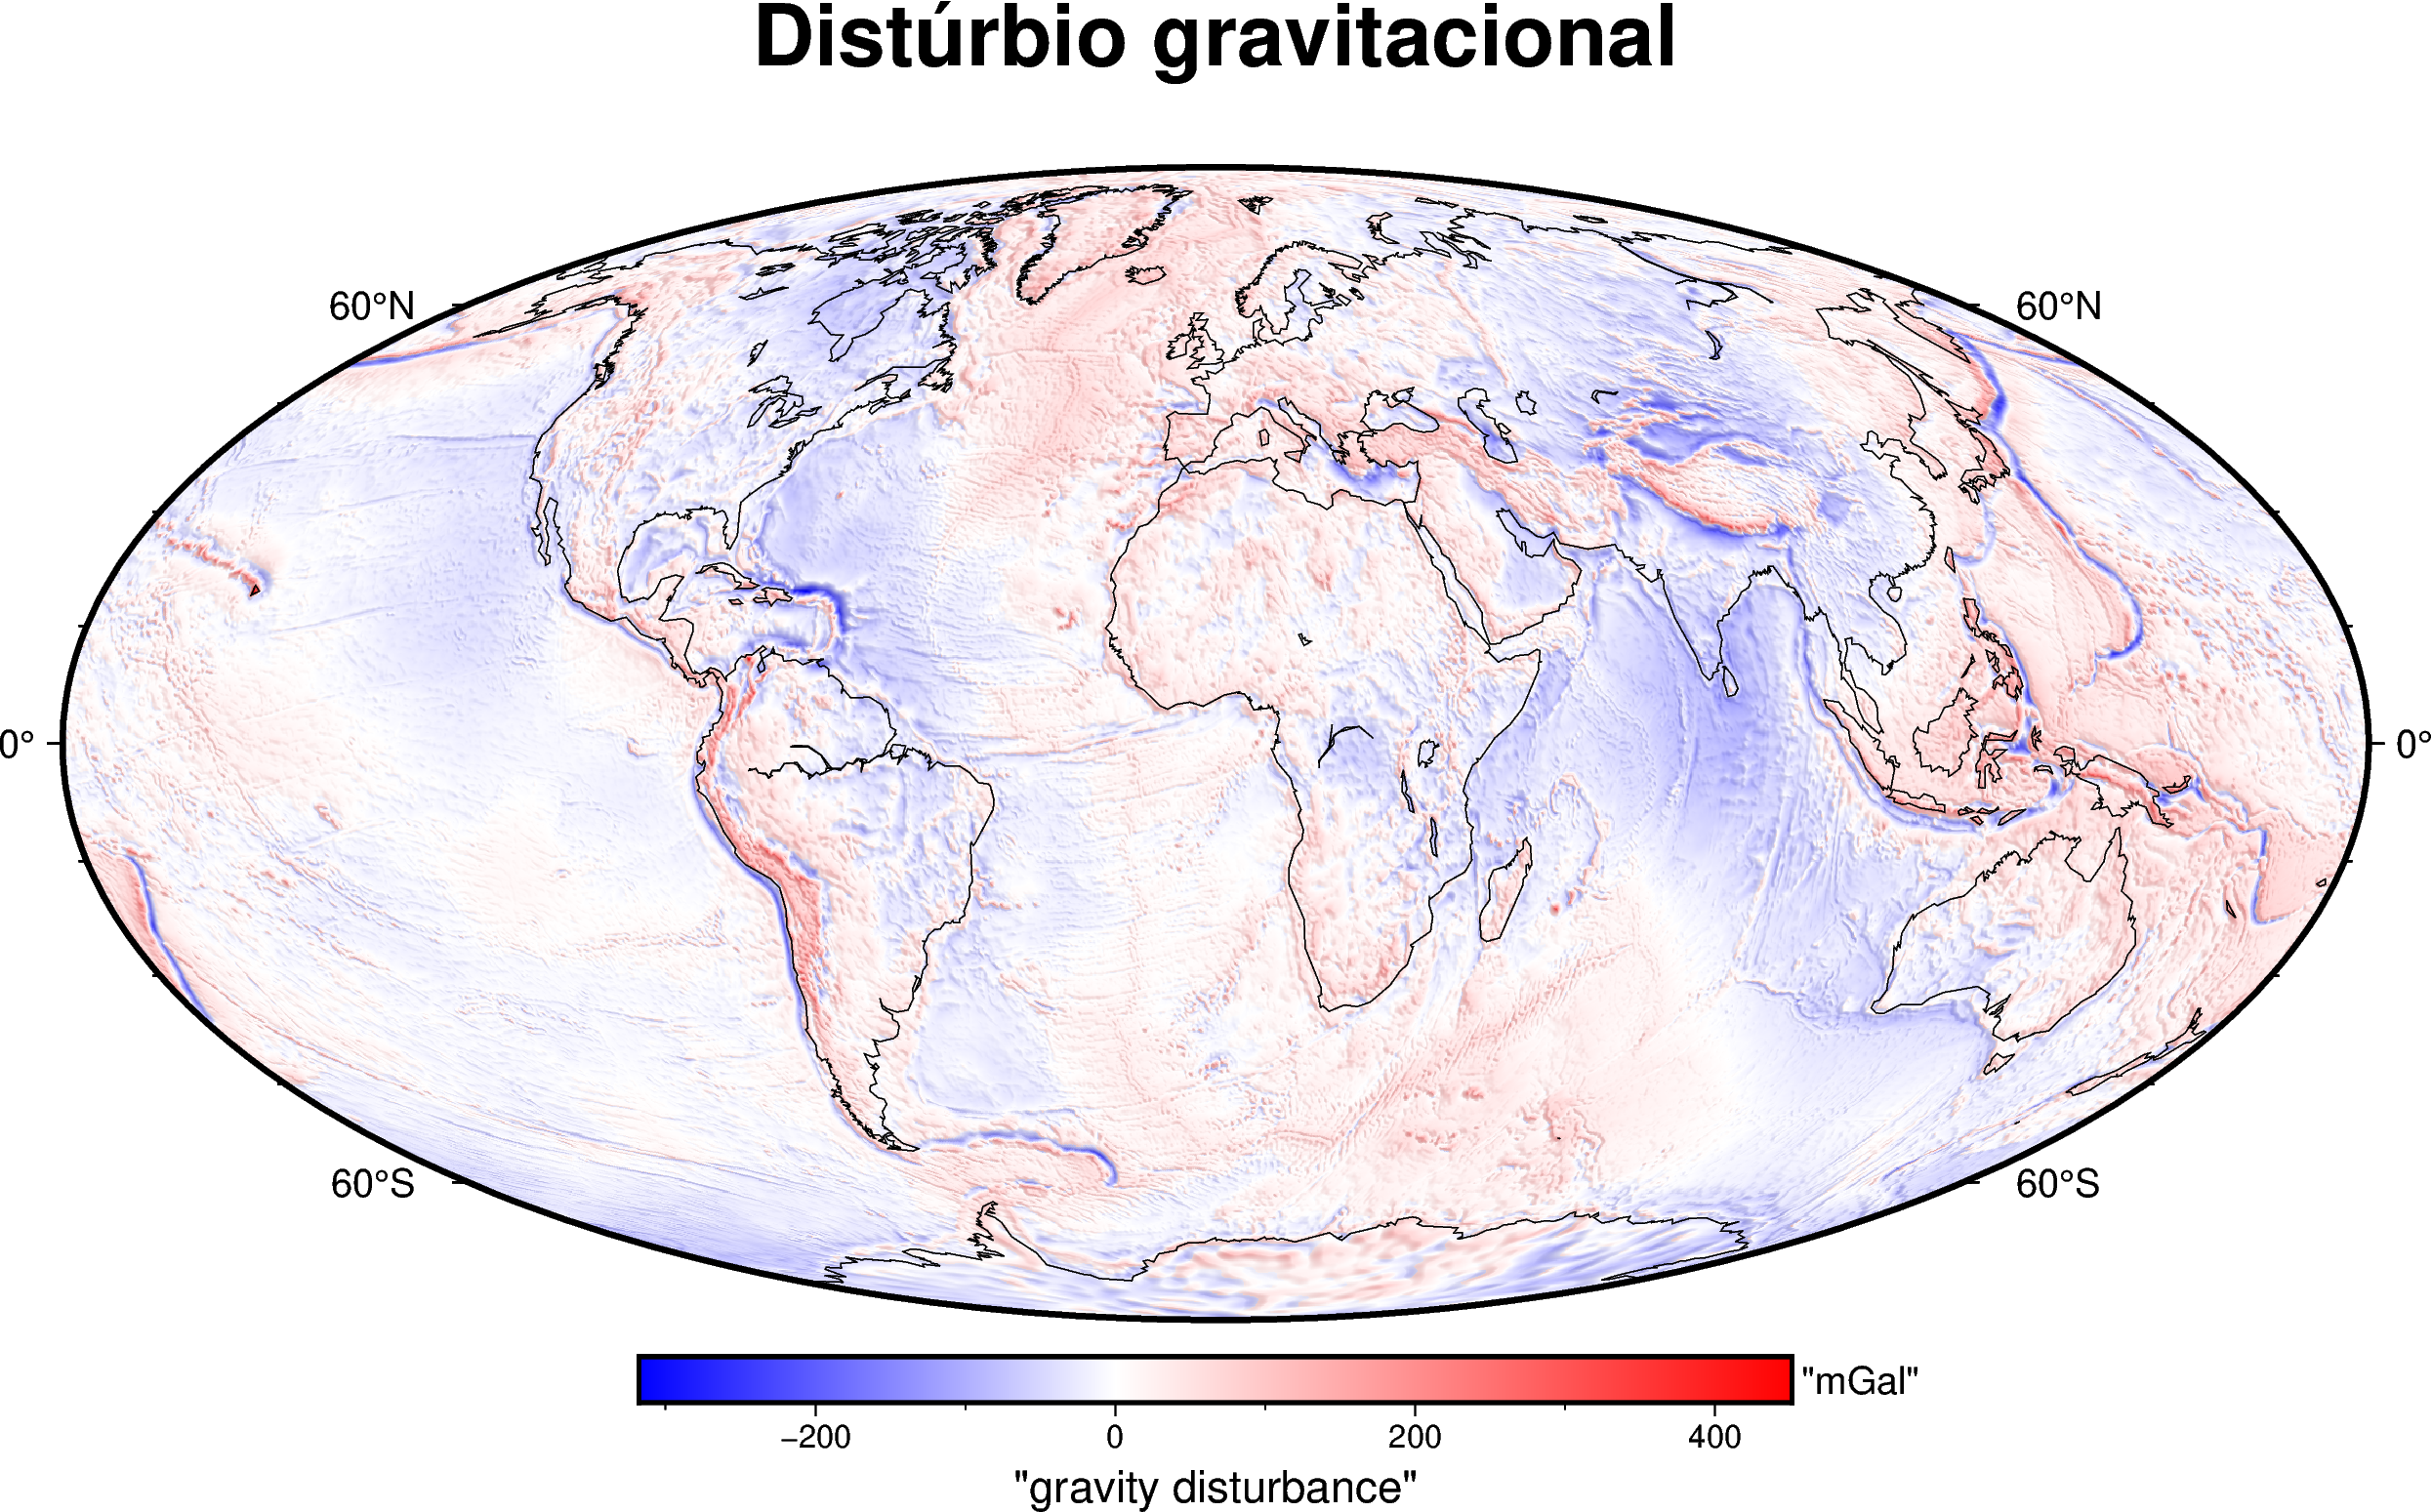

In [11]:
fig = pygmt.Figure()
fig.grdimage(
    disturbance, projection="W20c", cmap="polar+h", shading="+a45+nt0.2", frame = '+t Distúrbio gravitacional',
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"gravity disturbance"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.show()

## Importante!

### O geoide e o elipsoide são diferentes. O elipsoide é uma semi-esfera lisa e achatada nos polos. O geoide é irregular e não plano, seguindo as variações gravitacionais da Terra, e baseado no nível médio do mar. 

### Alguns dados como o do ETOPO1 fornecem topografias referentes ao geoide e não ao elipsóide. Nesse caso, é preciso fazer um pequeno ajuste para que a Anomalia Bouguer seja calculada corretamente, soma-se os dados de topografia com os do geoide, assim podendo inferir os pontos acima do elipsoide e abaixo dele, possibilitando assim a correção de Bouguer

In [12]:
fname_geoid = ensaio.fetch_earth_geoid(version=1)
fname_topo = ensaio.fetch_earth_topography(version=1)

data = xr.merge(

    [xr.load_dataarray(fname_gravity),
    xr.load_dataarray(fname_geoid),
    xr.load_dataarray(fname_topo),]


)
data


<xarray.Dataset> Size: 65MB
Dimensions:     (longitude: 2161, latitude: 1081)
Coordinates:
  * longitude   (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude    (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height      (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04
Data variables:
    gravity     (latitude, longitude) float64 19MB 9.801e+05 ... 9.802e+05
    geoid       (latitude, longitude) float64 19MB -29.5 -29.5 ... 15.4 15.4
    topography  (latitude, longitude) float64 19MB 2.742e+03 ... -4.237e+03
Attributes:
    Conventions:     CF-1.8
    title:           Gravity acceleration (EIGEN-6C4) at a constant geometric...
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       gravity acceleration
    description:     magnitude of the gravity acceleration vector (gravitatio...
    units:           mGal
    actual_range:    [974748.6 980201.9]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

In [13]:
topography_adjust = data.topography + data.geoid
topography_adjust

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[ 2712.5,  2712.5,  2712.5, ...,  2712.5,  2712.5,  2712.5],
       [ 2738.5,  2738.5,  2738.5, ...,  2738.5,  2738.5,  2738.5],
       [ 2792.4,  2792.4,  2791.4, ...,  2792.4,  2792.4,  2792.4],
       ...,
       [-4228.3, -4229.3, -4230.3, ..., -4227.3, -4228.3, -4228.3],
       [-4140.8, -4141.8, -4141.8, ..., -4140.8, -4140.8, -4140.8],
       [-4221.6, -4221.6, -4221.6, ..., -4221.6, -4221.6, -4221.6]],
      shape=(1081, 2161))
Coordinates:
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

In [14]:
bouguer_correction = hm.bouguer_correction(topography_adjust) # correção de bouguer
anomaly = disturbance - bouguer_correction # diferente do distúrbio!


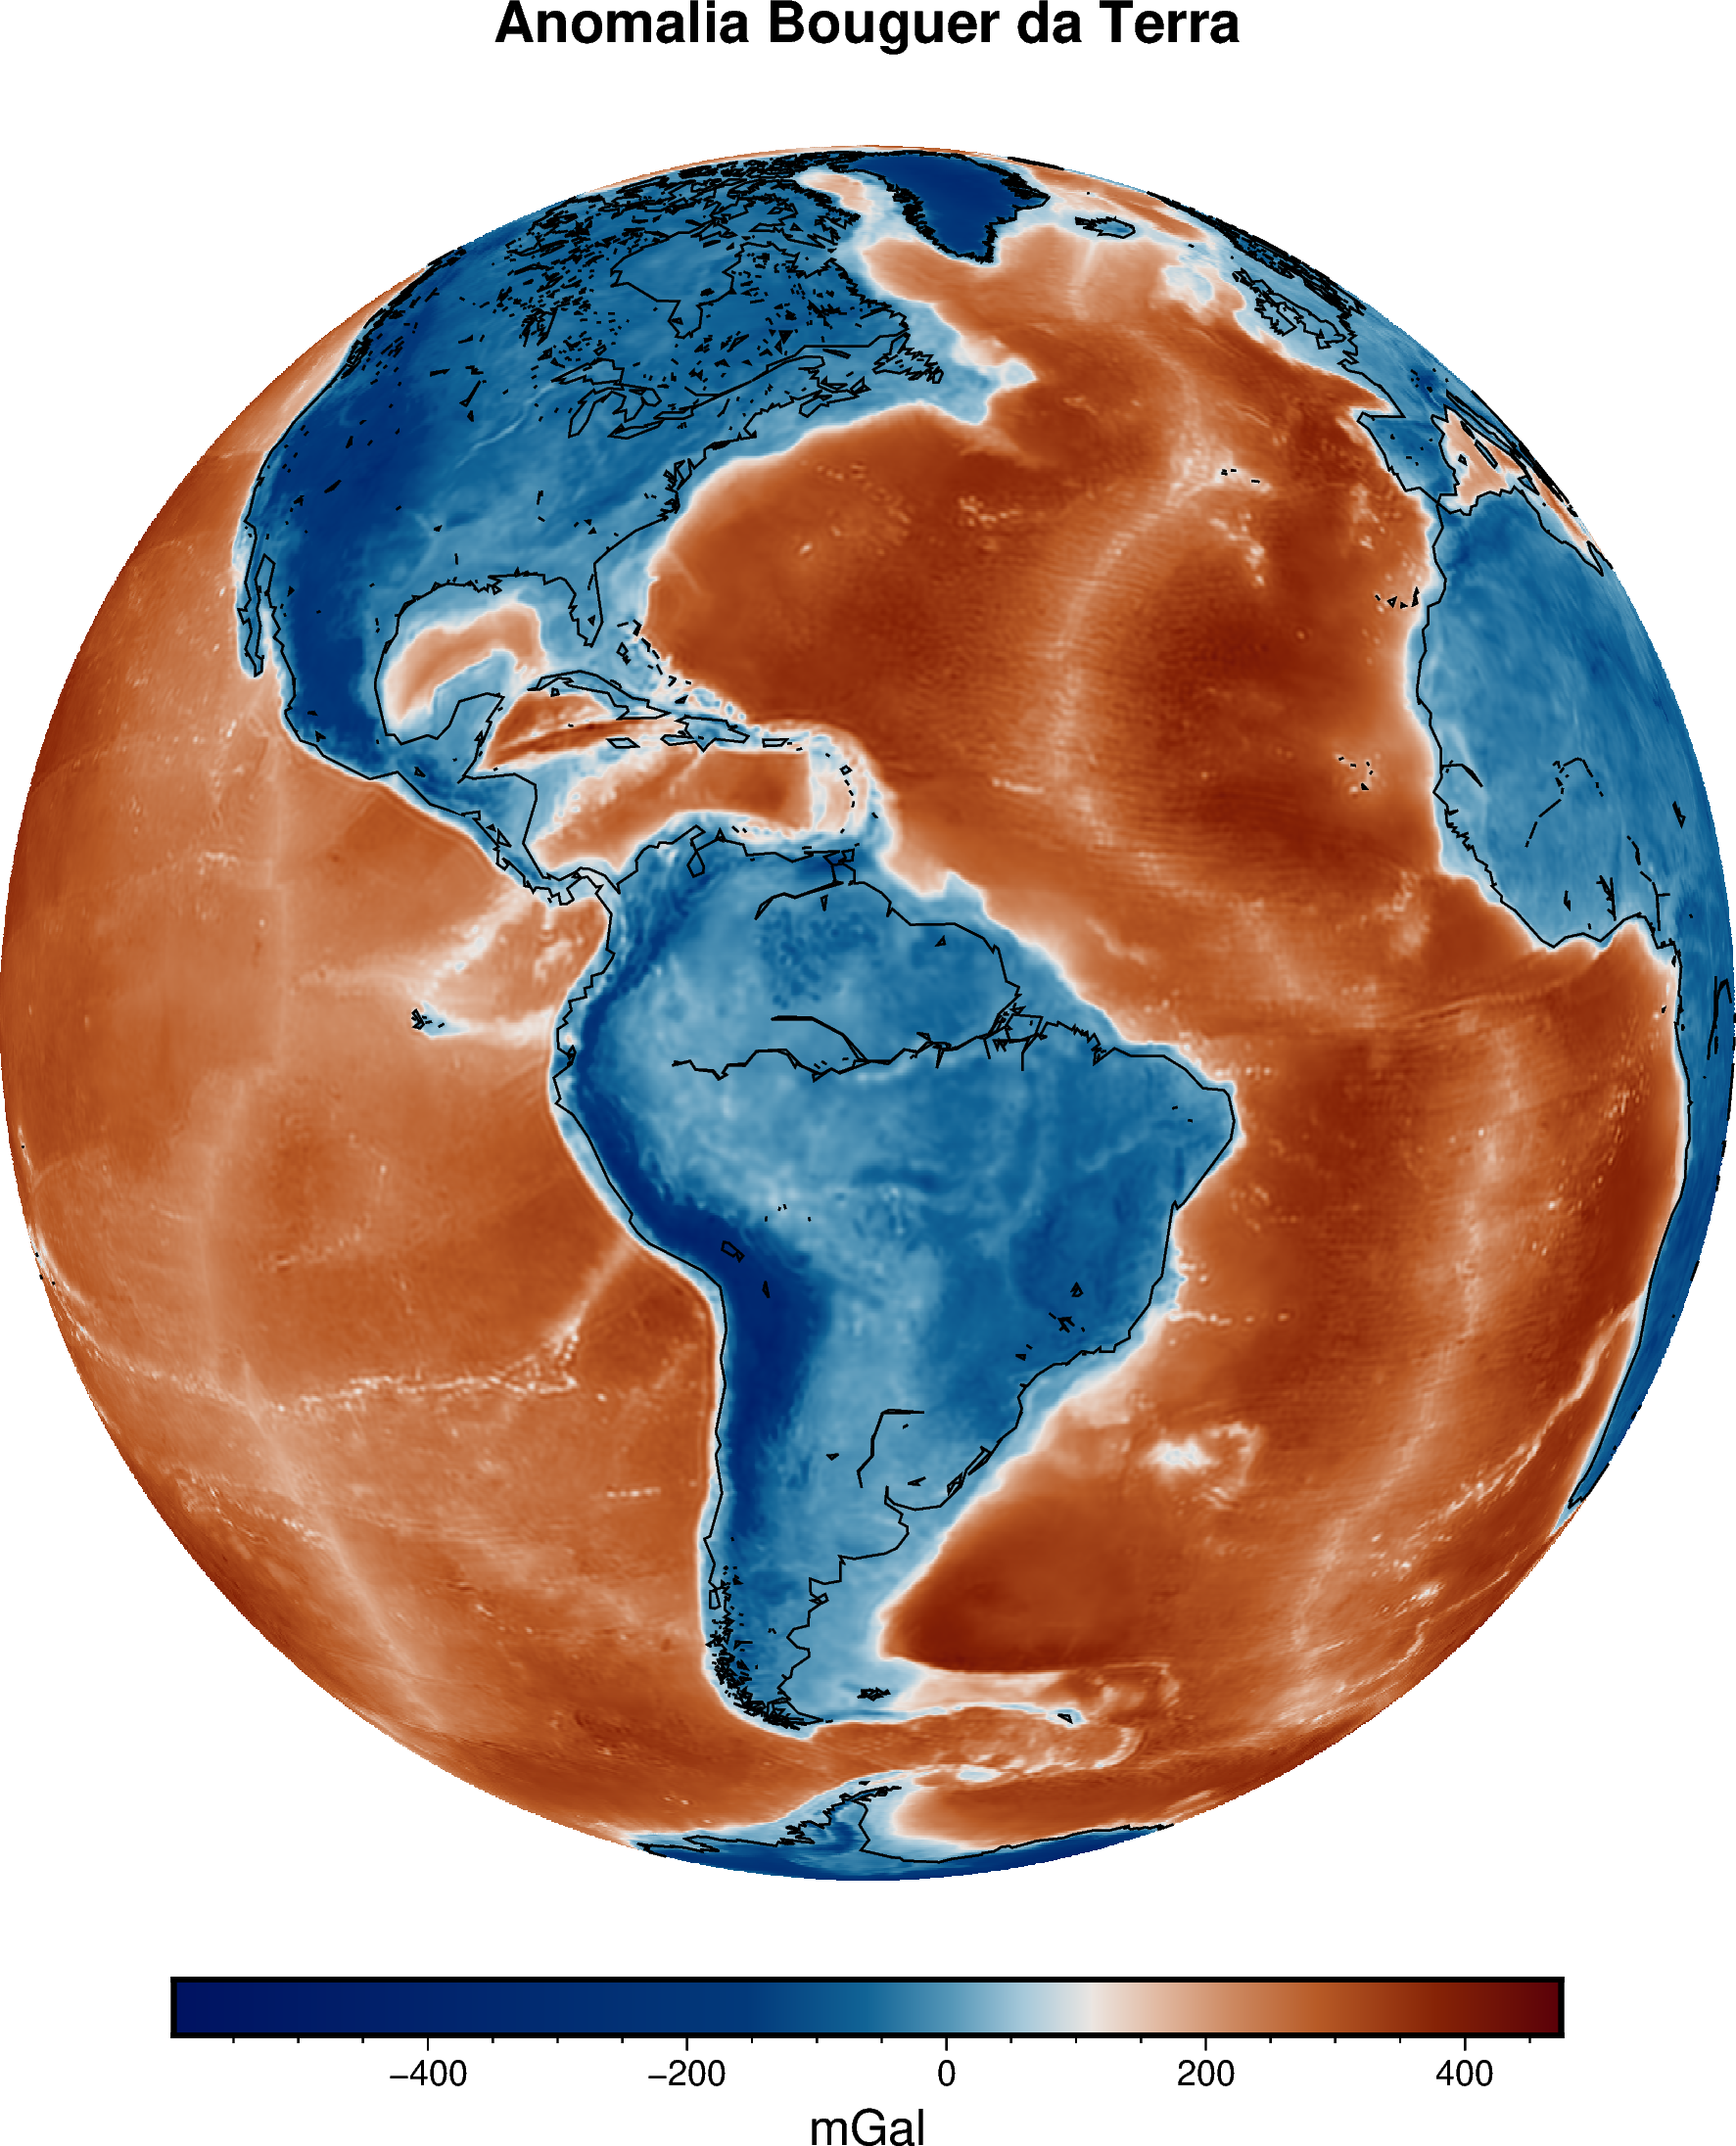

In [15]:
# Make a plot of data using PyGMT
fig = pygmt.Figure()

pygmt.grd2cpt(grid=anomaly, cmap="vik+h0", continuous=True)

title = "Anomalia Bouguer da Terra"

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        region="g",
        projection="G-60/0/15c",
        frame=f"+t{title}",
        grid=anomaly,
        cmap=True,
    )

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["a200f50", "x+lmGal"])

fig.show()

## Anomalia x Topografia



Para uma regressão, o scipy retorna 5 parâmetros:

* Slope (m)
* Intercept (q)
* Erro padrão (std_err)
* Valor R (r_val)
* Valor P (p_val)

In [24]:
lat_centro = -3
lon_centro = -60
janela_graus = 3

metade_janela = janela_graus/2

lat_min = lat_centro - metade_janela
lat_max = lat_centro + metade_janela
lon_min = lon_centro - metade_janela 
lon_max = lon_centro + metade_janela 


dados_plot = xr.Dataset(
    {'bouguer': anomaly, 'topografia': topography_adjust}

)
dados_plot




<xarray.Dataset> Size: 47MB
Dimensions:     (longitude: 2161, latitude: 1081)
Coordinates:
  * longitude   (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude    (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height      (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04
Data variables:
    bouguer     (latitude, longitude) float64 19MB -339.5 -339.5 ... 303.8 303.8
    topografia  (latitude, longitude) float64 19MB 2.712e+03 ... -4.222e+03

In [25]:
dados_plot_janela = dados_plot.sel(
    latitude = slice(lat_min, lat_max), # quero a 'fatia' que corresponde às bordas da minha janela
    longitude = slice(lon_min, lon_max),
)

dados_plot_janela

<xarray.Dataset> Size: 8kB
Dimensions:     (longitude: 19, latitude: 19)
Coordinates:
  * longitude   (longitude) float64 152B -61.5 -61.33 -61.17 ... -58.67 -58.5
  * latitude    (latitude) float64 152B -4.5 -4.333 -4.167 ... -1.667 -1.5
    height      (latitude, longitude) float32 1kB 1e+04 1e+04 ... 1e+04 1e+04
Data variables:
    bouguer     (latitude, longitude) float64 3kB -4.388 -9.095 ... -26.85
    topografia  (latitude, longitude) float64 3kB 44.8 40.4 38.0 ... 68.8 100.5

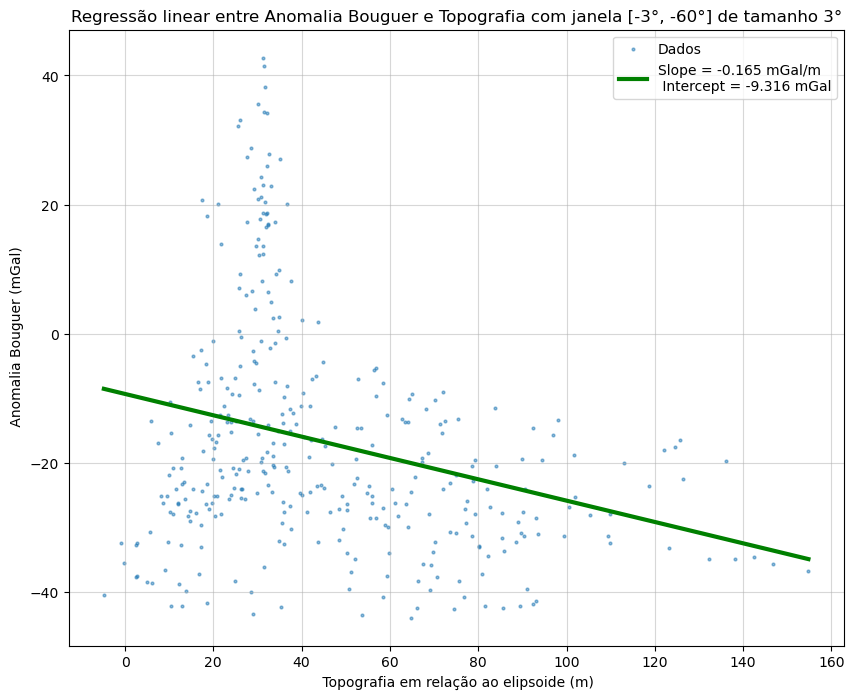

In [26]:
fig, ax = plt.subplots(figsize = (10,8))

x_dados = dados_plot_janela.topografia.values.ravel()
y_dados = dados_plot_janela.bouguer.values.ravel()

mask = ~np.isnan(x_dados) & ~np.isnan(y_dados)
x = x_dados[mask]
y = y_dados[mask]


if len(x)<2:
    print(f'Sem dados válidos, apenas um ponto no eixo.')

else:
    ax.scatter(x,y, s=4.0, alpha=0.5, label = 'Dados') # plota os pontos

    slope, intercept, r_val, p_val, std_err = scipy.stats.linregress(x,y) #calculo os coeficientes

    x_linha = np.array([np.min(x), np.max(x)]) #faço as linhas com base nos coeficientes e parâmetros
    y_linha = slope * x_linha + intercept

    ax.plot(x_linha, y_linha, 'g-', linewidth=3.0, label = f'Slope = {slope:.3f} mGal/m \n Intercept = {intercept:.3f} mGal') # ploto minha linha de regressão
    ax.legend() # aplico label onde tiver


    ax.set_title(f'Regressão linear entre Anomalia Bouguer e Topografia com janela [{lat_centro}°, {lon_centro}°] de tamanho {janela_graus}°')
    ax.set_xlabel(f' Topografia em relação ao elipsoide (m)')
    ax.set_ylabel(f' Anomalia Bouguer (mGal)')
    ax.grid(True, linestyle='-', alpha = 0.5)

    #fig.savefig(f'regressao-bouguer-{lat_centro}-{lon_centro}-janela-{janela_graus}', dpi = 300)
    plt.show()
    
                  

    

    
                       

    